In [351]:
import pandas as pd
import numpy as np
import os

In [352]:
files = [file for file in os.listdir("Untitled Folder")]
one_csv = pd.DataFrame()
for file in files:
    data = pd.read_csv("Untitled Folder/"+file)
    one_csv = pd.concat([one_csv, data])
    
one_csv.to_csv("Sales.csv", index = False)

In [353]:
all_data = pd.read_csv("Sales.csv")
all_data.dropna(inplace=True)

In [354]:
all_data.isna().sum().sum()

0

In [355]:
all_data["month"] = all_data["Order Date"].str[0:2]

In [356]:
try:
    all_data["month"] = all_data["month"].astype(int)
except ValueError:
    all_data["month"] = pd.to_numeric(all_data["month"], errors='coerce').astype(pd.Int64Dtype())

# Print the updated DataFrame
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001",12
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12


In [357]:
all_data["Quantity Ordered"] = pd.to_numeric(all_data["Quantity Ordered"], errors='coerce').astype("Int64")
all_data["Price Each"] = pd.to_numeric(all_data["Price Each"], errors='coerce').astype("float")
all_data["Order ID"] = pd.to_numeric(all_data["Order ID"], errors='coerce').astype("Int64")
all_data["Purchase Address"] = all_data["Purchase Address"].astype("str")
ty = all_data.dtypes
print(ty)

Order ID              Int64
Product              object
Quantity Ordered      Int64
Price Each          float64
Order Date           object
Purchase Address     object
month                 Int64
dtype: object


In [358]:
all_data["sales"] = (all_data["Quantity Ordered"]) * (all_data["Price Each"])
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.0
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.0
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95


In [359]:
result = all_data.groupby("month").sum(int)
result

,Order ID,Quantity Ordered,Price Each,sales
month,,,,
1,1421630798,10903,1811768.38,1822256.73
2,1871052592,13449,2188884.72,2202022.42
3,2564810956,17005,2791207.83,2807100.38
4,3387347100,20558,3367671.02,3390670.24
5,3345871523,18667,3135125.13,3152606.75
6,2932976072,15253,2562025.61,2577802.26
7,3284139576,16072,2632539.56,2647775.76
8,2899373917,13448,2230345.42,2244467.88
9,2948726831,13109,2084992.09,2097560.13


<function matplotlib.pyplot.show(close=None, block=None)>

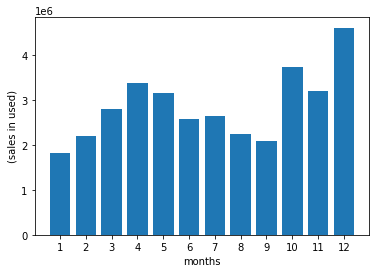

In [360]:
import matplotlib.pyplot as plt
month = range(1,13)
plt.bar(month, result['sales'])
plt.xticks(month)
plt.ylabel('(sales in used)')
plt.xlabel("months")
plt.show

In [370]:
address_components = all_data['Purchase Address'].str.split(', ', expand=True)
all_data['Street'] = address_components[0]
all_data['City'] = address_components[1]
state_zip = address_components[2].str.split(" ", expand=True)

all_data["State"] = state_zip[0]
all_data["ZipCode"] = state_zip[1]
all_data['City'] = all_data['City'] + ' (' + all_data['State'] + ')'
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,Street,City,State,ZipCode
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.0,136 Church St,New York City (NY),NY,10001
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.0,562 2nd St,New York City (NY),NY,10001
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95,277 Main St,New York City (NY),NY,10001
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,410 6th St,San Francisco (CA),CA,94016
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,43 Hill St,Atlanta (GA),GA,30301
...,...,...,...,...,...,...,...,...,...,...,...,...
186845,222905,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215",6,2.99,795 Pine St,Boston (MA),MA,02215
186846,222906,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001",6,149.99,495 North St,New York City (NY),NY,10001
186847,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016",6,11.95,319 Ridge St,San Francisco (CA),CA,94016
186848,222908,USB-C Charging Cable,1,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016",6,11.95,916 Main St,San Francisco (CA),CA,94016


In [371]:
all_data = all_data.dropna()
city_with_high_sales = all_data.groupby("City").sum(int)
city_with_high_sales

,Order ID,Quantity Ordered,Price Each,month,sales
City,,,,,
Atlanta (GA),3423838407,16602,2779908.20,104794,2795498.58
Austin (TX),2280982185,11153,1809873.61,69829,1819581.75
Boston (MA),4598265261,22528,3637409.77,141112,3661642.01
Dallas (TX),3415643578,16730,2752627.82,104620,2767975.4
Los Angeles (CA),6811084693,33289,5421435.23,208325,5452570.8
New York City (NY),5736333884,27932,4635370.83,175741,4664317.43
Portland (ME),563266345,2750,447189.25,17144,449758.27
Portland (OR),2305594747,11303,1860558.22,70621,1870732.34
San Francisco (CA),10304443952,50239,8211461.74,315520,8262203.91


In [372]:

ty = all_data.dtypes
print(ty)

Order ID              Int64
Product              object
Quantity Ordered      Int64
Price Each          float64
Order Date           object
Purchase Address     object
month                 Int64
sales               Float64
Street               object
City                 object
State                object
ZipCode              object
dtype: object


<function matplotlib.pyplot.show(close=None, block=None)>

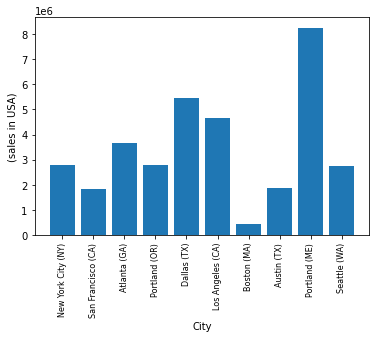

In [373]:
import matplotlib.pyplot as plt
City = all_data['City'].unique()
Sales = city_with_high_sales['sales'].unique()
plt.bar(City, Sales)
plt.xticks(City, rotation = "vertical", size = 8)
plt.ylabel('(sales in USA)')
plt.xlabel("City")
plt.show

In [378]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

all_data['date'] = all_data['Order Date'].dt.date
all_data['hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute

In [379]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,Street,City,State,ZipCode,date,time,hour,Minute
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.0,136 Church St,New York City (NY),NY,10001,2019-12-30,00:01:00,0,1
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.0,562 2nd St,New York City (NY),NY,10001,2019-12-29,07:03:00,7,3
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,277 Main St,New York City (NY),NY,10001,2019-12-12,18:21:00,18,21
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,410 6th St,San Francisco (CA),CA,94016,2019-12-22,15:13:00,15,13
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,43 Hill St,Atlanta (GA),GA,30301,2019-12-18,12:38:00,12,38


In [383]:
max_sales_by_time = all_data.groupby("hour").count()
max_sales_by_time

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,Street,City,State,ZipCode,date,time,Minute
hour,,,,,,,,,,,,,,,
0,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910
1,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350
2,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243
3,831,831,831,831,831,831,831,831,831,831,831,831,831,831,831
4,854,854,854,854,854,854,854,854,854,854,854,854,854,854,854
5,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321
6,2482,2482,2482,2482,2482,2482,2482,2482,2482,2482,2482,2482,2482,2482,2482
7,4011,4011,4011,4011,4011,4011,4011,4011,4011,4011,4011,4011,4011,4011,4011
8,6256,6256,6256,6256,6256,6256,6256,6256,6256,6256,6256,6256,6256,6256,6256


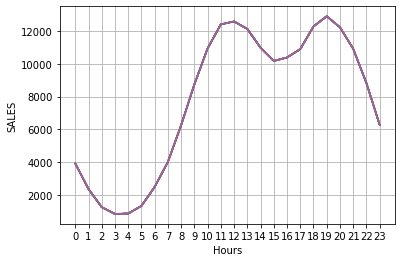

In [388]:
hour = [hour for hour, df in all_data.groupby("hour")]
plt.plot(hour,max_sales_by_time)
plt.grid()
plt.xlabel("Hours")
plt.ylabel("SALES")
plt.xticks(hour)
plt.show()

In [422]:
Sold_together = all_data[all_data["Order ID"].duplicated(keep=False)]

Sold_together["Grouped"] = Sold_together.groupby("Order ID")['Product'].transform(lambda x: ','.join(x))
# Sold_together["Grouped"]  = Sold_together.loc[('Order ID', 'Product')]
Sold_together = Sold_together[["Grouped","Order ID"]].drop_duplicates()
Sold_together.head()

<ipython-input-422-2b822539ec10>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Sold_together["Grouped"] = Sold_together.groupby("Order ID")['Product'].transform(lambda x: ','.join(x))


,Grouped,Order ID
16,"Google Phone,USB-C Charging Cable,Bose SoundSp...",295681
36,"Vareebadd Phone,USB-C Charging Cable",295698
42,"AA Batteries (4-pack),Bose SoundSport Headphones",295703
66,"iPhone,Lightning Charging Cable",295726
76,"iPhone,Apple Airpods Headphones,Wired Headphones",295735


In [423]:
from itertools import combinations
from collections import Counter


In [424]:
count = Counter()
for row in Sold_together['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2)))

for key, value in count.most_common(10):

    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


In [428]:
producted_grouped = all_data.groupby('Product')
producted_grouped.sum()

,Order ID,Quantity Ordered,Price Each,month,sales,hour,Minute
Product,,,,,,,
20in Monitor,950889651,4129,451068.99,29336,454148.71,58764,122252
27in 4K Gaming Monitor,1442588628,6244,2429637.70,44440,2435097.56,90916,184331
27in FHD Monitor,1724223743,7550,1125974.93,52558,1132424.5,107540,219948
34in Ultrawide Monitor,1418985948,6199,2348718.19,43304,2355558.01,89076,183480
AA Batteries (4-pack),4744173938,27635,79015.68,145558,106118.4,298342,609039
AAA Batteries (4-pack),4764959472,31017,61716.59,146370,92740.83,297332,612113
Apple Airpods Headphones,3579120098,15661,2332350.00,109477,2349150.0,223304,455570
Bose SoundSport Headphones,3071496156,13457,1332366.75,94113,1345565.43,192445,392603
Flatscreen TV,1110943207,4819,1440000.00,34224,1445700.0,68815,142789


In [429]:
Quantity_ordered = producted_grouped.sum()["Quantity Ordered"]

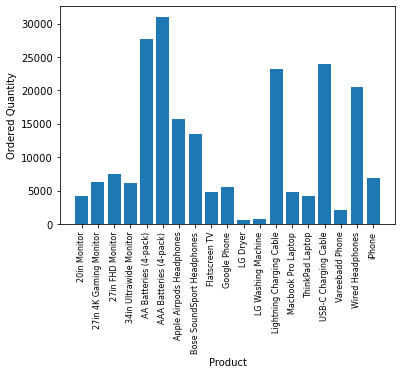

In [433]:
product = [product for product, df in producted_grouped]
plt.bar(product,Quantity_ordered)
plt.xlabel("Product")
plt.ylabel("Ordered Quantity")
plt.xticks(product, rotation = "vertical", size = 8)
plt.show()

In [435]:
prices = all_data.groupby('Product').mean()['Price Each']
prices

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

<ipython-input-459-31a669f68925>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(product, rotation = "vertical", size = 8)


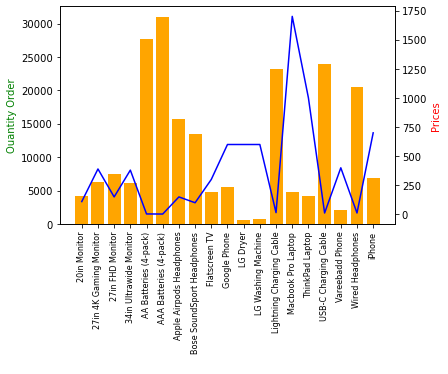

In [459]:
fig, ax1 = plt.subplots()

ax2= ax1.twinx()
ax1.bar(product,Quantity_ordered,color = 'orange')
ax2.plot(product,prices,"b-", color = 'blue')

ax1.set_xlabel("product",color= "white")
ax1.set_ylabel("Ouantity Order",color = 'g')
ax2.set_ylabel("Prices",color = 'r')
ax1.set_xticklabels(product, rotation = "vertical", size = 8)
plt.show()